# Image similarity search with clustering

In [1]:
from image_classification_simulation.data.office31_loader import (
    Office31Loader
)
from image_classification_simulation.models.clustering import (
    show_grid_images
)
from image_classification_simulation.image_search import (
    ImageSimilaritySearch
)


In [2]:
hparams = {
    "num_workers": 2,
    'batch_size': 32,
    "image_size":224,
    "train_test_split":0.1,
}
office_loader = Office31Loader(data_dir="../examples/data/domain_adaptation_images/amazon/images/", hyper_params=hparams)
office_loader.setup('fit')
train_loader = office_loader.train_dataloader()
val_loader = office_loader.val_dataloader()
test_loader = office_loader.test_dataloader()

hparams = {
        "clustering_alg": "MiniBatchKMeans",
        "loss": "CrossEntropyLoss",
        "batch_size": 32,
        "pretrained": True,
        "num_classes": 31,
        "path_features_ext": "../examples/resnet/output/best_model/model.ckpt",
        "architecture": "resnet",
        "num_clusters": 31,
        "random_state": 0,
        "clustering_batch_size": 100,
        "size":256,
        "reassignment_ratio": 0.05,
        "path_to_model": "../debug/debug_clustering_model",
        "path_cluster_ids": "../debug/debug_cluster_ids.npy",
    }
image_search = ImageSimilaritySearch(hparams, office_loader)
image_search.setup()

>>> loaded cluster ids from file
[MiniBatchKMeans] Reassigning 16 cluster centers.
[MiniBatchKMeans] Reassigning 12 cluster centers.
[MiniBatchKMeans] Reassigning 5 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
[MiniBatchKMeans] Reassigning 3 cluster centers.
>>> loaded cluster ids from file
>>> setup completed successfully!


you may need to run this file as a python script to have results printed to file.

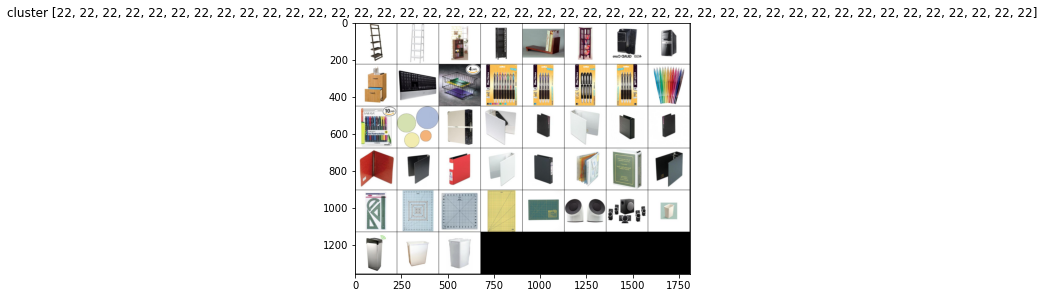

<Figure size 432x288 with 0 Axes>

In [3]:
target_images, target_cluster_ids = image_search.find_similar_images("./examples/backpack1.jpeg")
show_grid_images(target_images,target_cluster_ids,height=6,width=6,save_path='./query_result1.png')

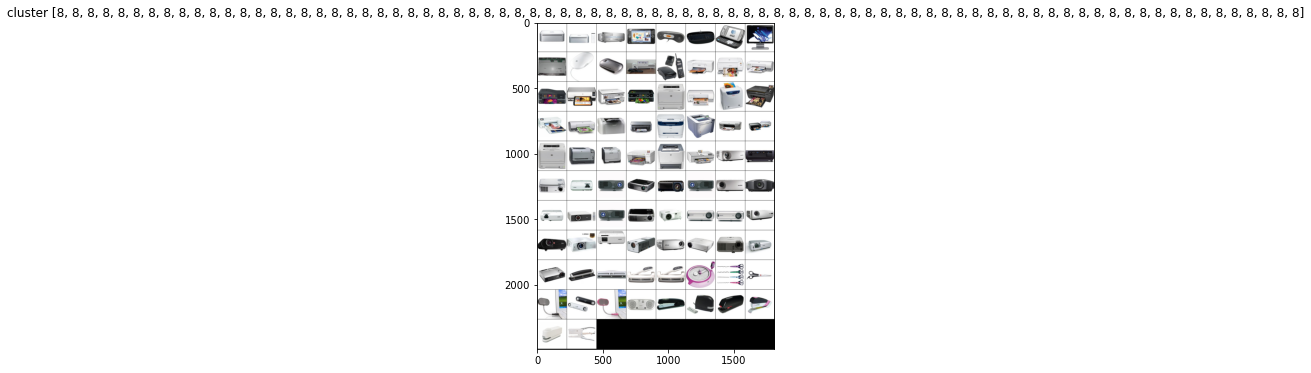

<Figure size 432x288 with 0 Axes>

In [4]:
target_images, target_cluster_ids = image_search.find_similar_images("./examples/backpack2.jpeg")
show_grid_images(target_images,target_cluster_ids,height=6,width=6,save_path='./query_result2.png')

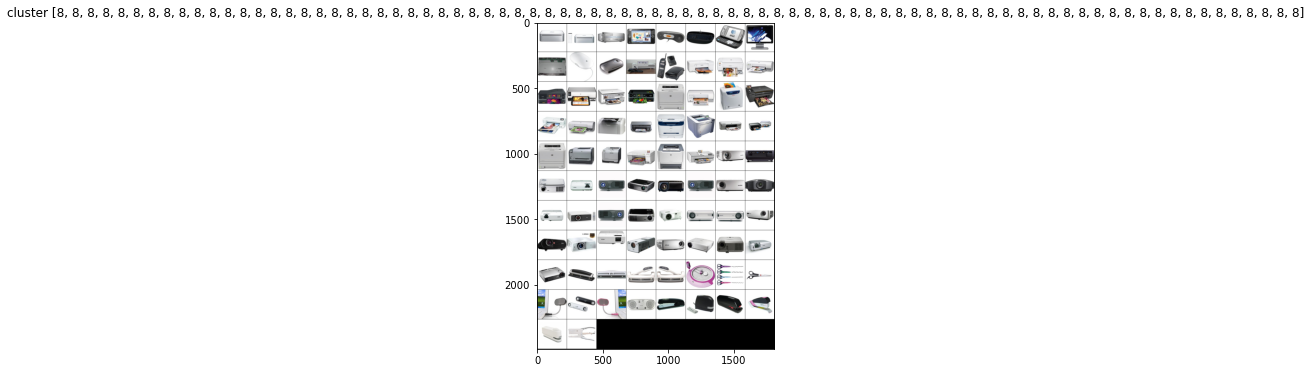

<Figure size 432x288 with 0 Axes>

In [5]:
target_images, target_cluster_ids = image_search.find_similar_images("./examples/backpack2.jpeg")
show_grid_images(target_images,target_cluster_ids,height=6,width=6,save_path='./query_result3.png')